In [1]:
!uname -a

Linux compute-0-14.local 2.6.32-642.el6.x86_64 #1 SMP Tue May 10 17:27:01 UTC 2016 x86_64 x86_64 x86_64 GNU/Linux


In [2]:
from snmachine import sndata, snfeatures, snclassifier, tsne_plot, example_data
from argparse import ArgumentParser
import itertools
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import rc
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
import time, os, pywt, subprocess
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from astropy.table import Table,join,vstack
from astropy.io import fits,ascii
import sklearn.metrics
import sncosmo
import yaml
import pandas as pd
%matplotlib nbagg

def plot_roc_curve(fpr, tpr, label=None):
    
    csfont = {'fontname':'Comic Sans MS'}
    hfont = {'fontname':'Helvetica'}

    plt.plot(fpr, tpr, linewidth=2, label=label)
#     plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel(r"False Positive Rate (FPR)", fontsize=16)
    plt.ylabel(r"True Positive Rate (TPR)", fontsize=16)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)

In [3]:
config='../examples/configs/plot_confs/rev_wfdY10_all.yml'

In [4]:
!pwd

/home/tallam/plasticc/snmachine/examples


In [5]:
try:
    with open(config) as f:
        params = yaml.load(f)
except IOError:
    print("Invalid yaml file provided")
    exit()

print("The PARAMS are:\n {}".format(params))

rocs = params.get("rocs", None)
print("The ROC data being used is listed as:\n{}".format(rocs))

# final_outdir=os.path.join('output_data', 'output_%s_no_z' %dataset,'')
final_outdir=os.path.join('output_data', '')
print("FINAL OUTDIR = {}".format(final_outdir))
# out_class=os.path.join(final_outdir, 'classifications_{}'.format(jobid), '')
# print("CLASSIFY OUTDIR = {}".format(out_class))
out_plots=os.path.join(final_outdir, 'plots', '')
print("PLOTS = {}".format(out_plots))

try:
    subprocess.call(['mkdir', '-p', out_plots])
except IOError:
    print("Already exists, use another name...")

The PARAMS are:
 {'rocs': [{'file': '/share/hypatia/snmachine_resources/data/LSST_Cadence_WhitePaperClassResults/output_data/revision/output_colossus_2667_wfd_Y10_no_z/classifications/waveletsrandom_forest.roc', 'auc': '/share/hypatia/snmachine_resources/data/LSST_Cadence_WhitePaperClassResults/output_data/revision/output_colossus_2667_wfd_Y10_no_z/classifications/waveletsrandom_forest.auc', 'probs': '/share/hypatia/snmachine_resources/data/LSST_Cadence_WhitePaperClassResults/output_data/revision/output_colossus_2667_wfd_Y10_no_z/classifications/waveletsrandom_forest.probs', 'sim': 'colossus_2667'}, {'file': '/share/hypatia/snmachine_resources/data/LSST_Cadence_WhitePaperClassResults/output_data/revision/output_kraken_2026_wfd_Y10_no_z/classifications/waveletsrandom_forest.roc', 'auc': '/share/hypatia/snmachine_resources/data/LSST_Cadence_WhitePaperClassResults/output_data/revision/output_kraken_2026_wfd_Y10_no_z/classifications/waveletsrandom_forest.auc', 'probs': '/share/hypatia/snma

<IPython.core.display.Javascript object>


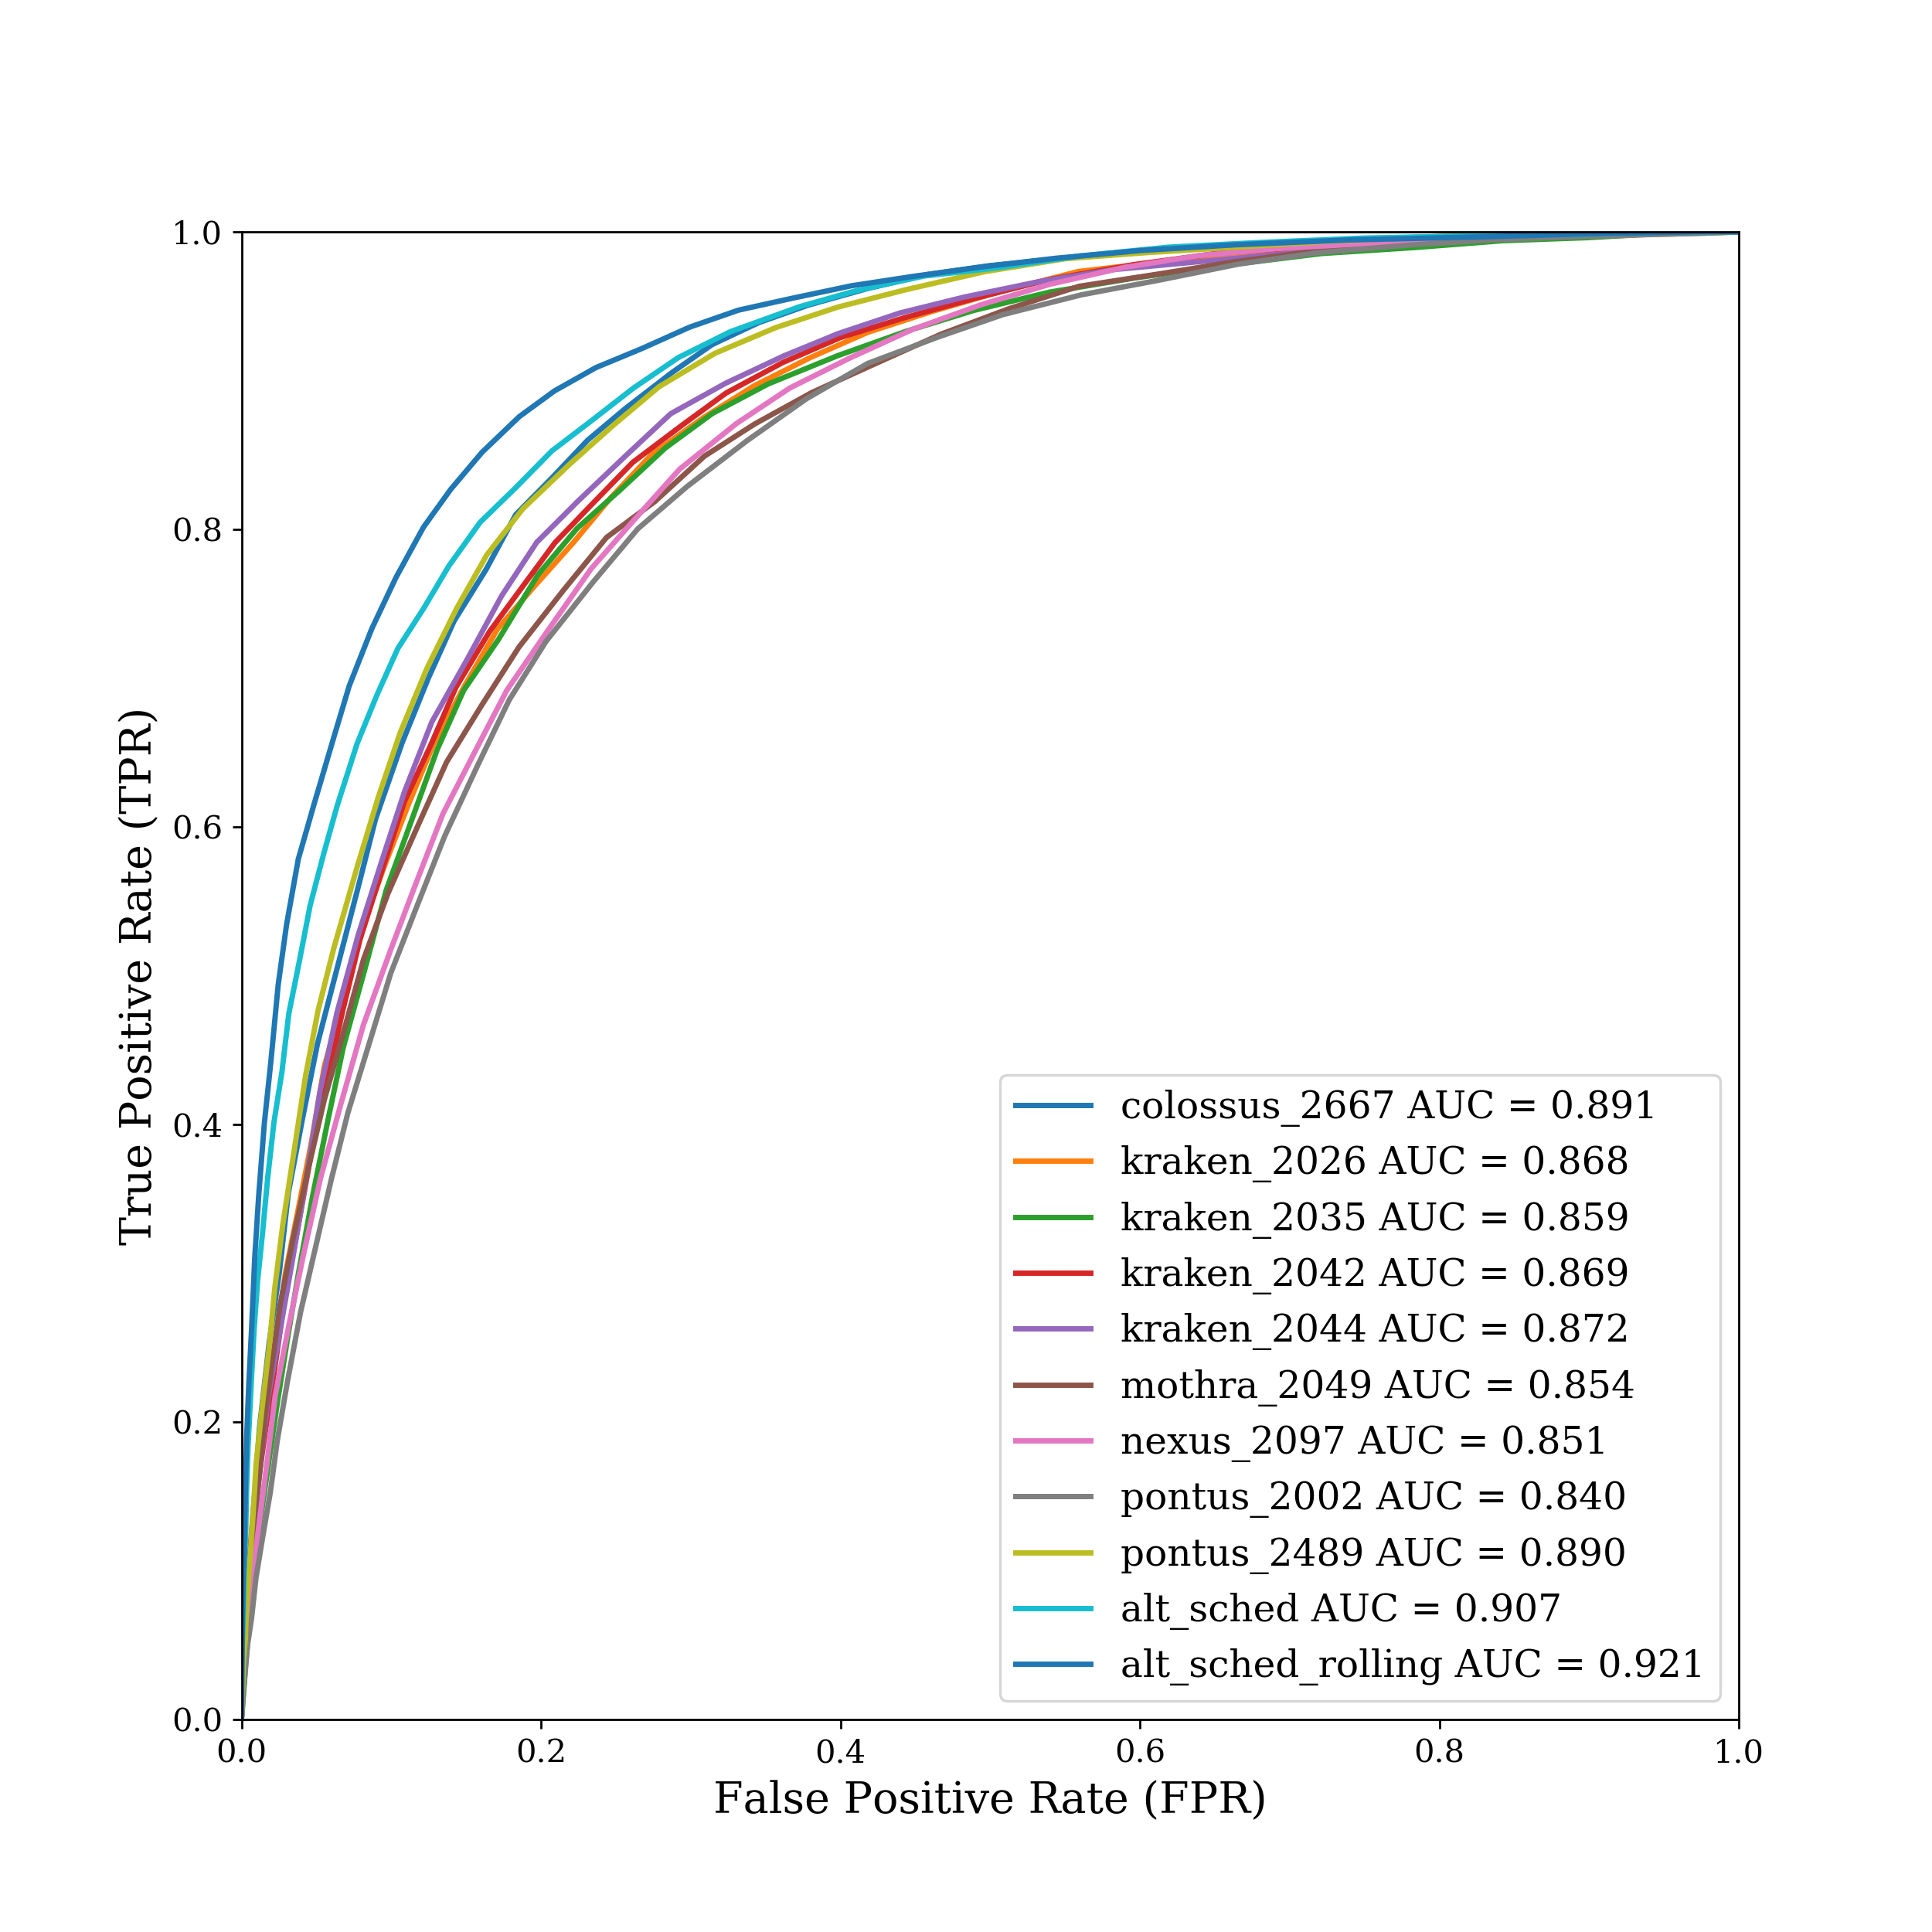

In [6]:
plt.figure(figsize=(10,10))
for i in range(len(rocs)):

    df = pd.read_csv(rocs[i]['file'], sep='\s+', engine='python')
    fpr = df['FPR']
    tpr = df['TPR']

    auc = pd.read_csv(rocs[i]['auc'], sep='\s+', header=None, engine='python')
    auc = auc.values[0][0]
    sim = rocs[i]['sim']

    plot_roc_curve(fpr, tpr, label="{} AUC = {:.3f}".format(sim, auc))
    plt.legend(loc="lower right", fontsize=14)

plt.show()
plt.savefig("{}wavelets_rf_ROC_cadence-rev.png".format(out_plots))